In [1]:
# Importing necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Question 1

Length of transform: 256


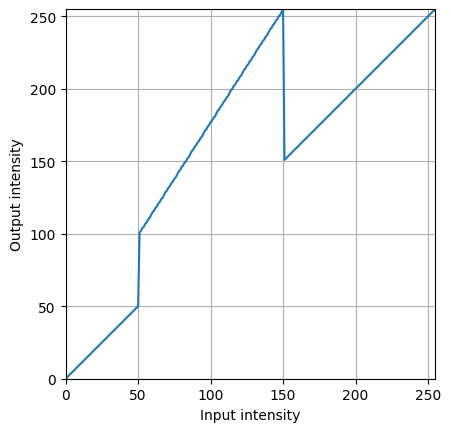

In [ ]:
c = np.array([(50, 50), (50, 100), (150, 255), (150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 -0).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1]+1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1]+1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

print("Length of transform: " + str(len(transform)))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r"Input intensity")
ax.set_ylabel(r"Output intensity")
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
ax.grid()

plt.savefig('./Report/resources/emma_intensity_transform_curve.png', dpi=300)
plt.show()

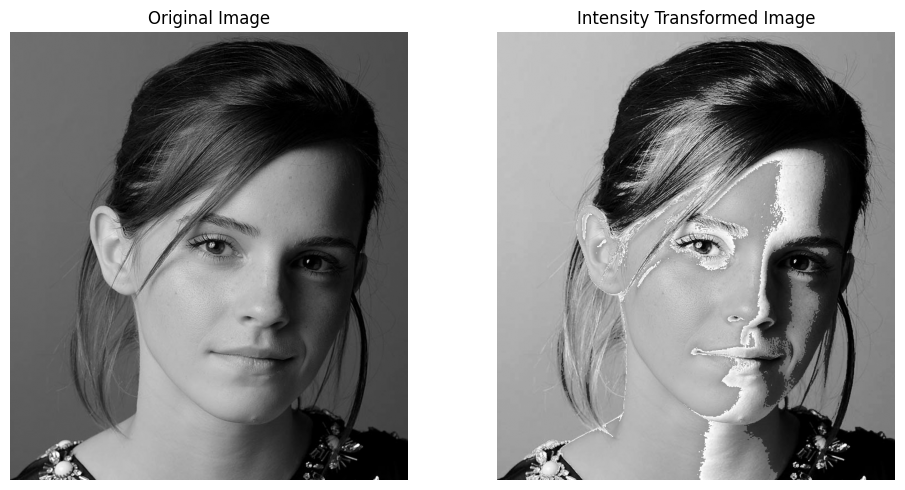

In [ ]:
img_emma = cv.imread("./a1images/emma.jpg", cv.IMREAD_GRAYSCALE)

img_emma_transformed = cv.LUT(img_emma, transform)

cv.imwrite("./Report/resources/emma_original.jpg", img_emma)
cv.imwrite("./Report/resources/emma_transformed.jpg", img_emma_transformed)

# Display both images side by side using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img_emma, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_emma_transformed, cmap='gray')
ax[1].set_title('Intensity Transformed Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Question 2

### accentuate white matter and grey matter

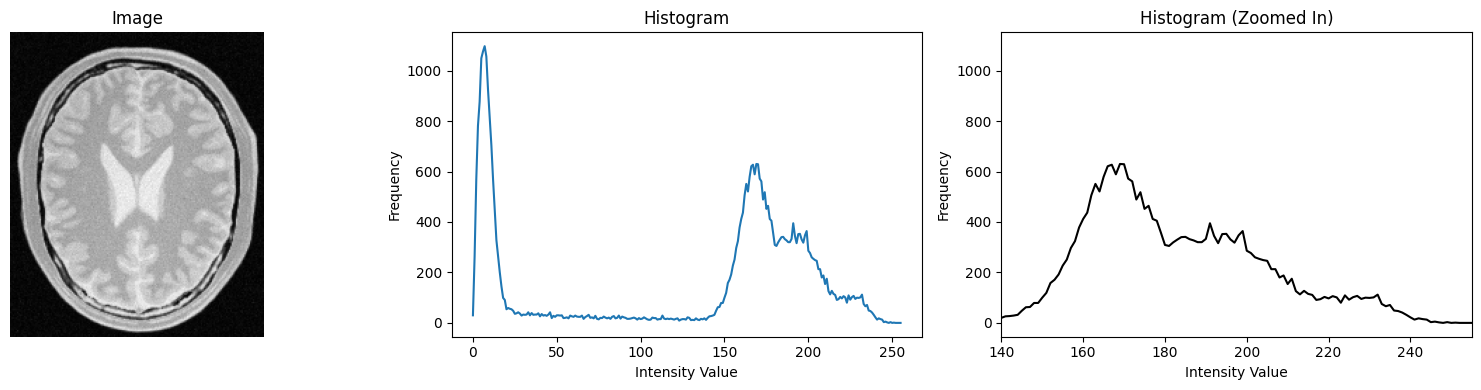

In [4]:
img_brain = cv.imread("./a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

hist = cv.calcHist([img_brain], [0], None, [256], [0, 256])
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(img_brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')

# Show histogram with zoom
ax[2].plot(hist, color='black')
ax[2].set_title('Histogram (Zoomed In)')
ax[2].set_xlabel('Intensity Value')
ax[2].set_ylabel('Frequency')
ax[2].set_xlim(140, 255)  

plt.tight_layout()
plt.show()

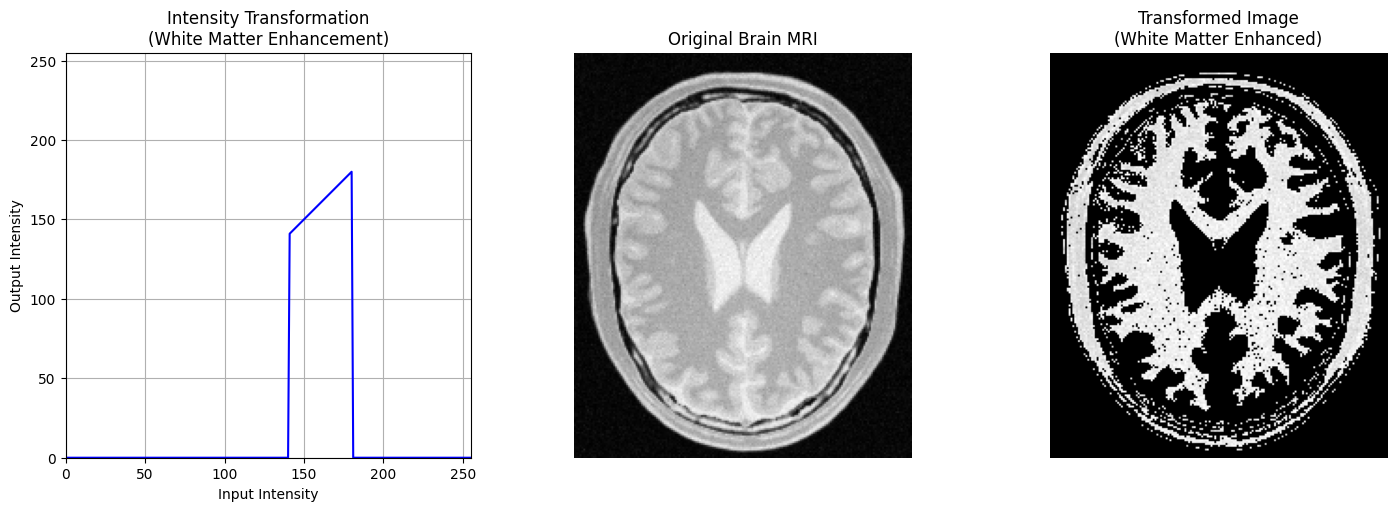

In [ ]:
c = np.array([(140, 0), (180, 180)])

t1 = np.zeros(c[0, 0] + 1).astype('uint8')
t2 = np.linspace(c[0, 0] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.zeros(256 - len(t1) - len(t2)).astype('uint8')

intensity_transform_white_matter = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

img_brain_transformed = cv.LUT(img_brain, intensity_transform_white_matter)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))


ax[0].plot(intensity_transform_white_matter, color='blue')
ax[0].set_title('Intensity Transformation\n(White Matter Enhancement)')
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Output Intensity')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
ax[0].grid(True)


ax[1].imshow(img_brain, cmap='gray')
ax[1].set_title('Original Brain MRI')
ax[1].axis('off')

# Transformed image
ax[2].imshow(img_brain_transformed, cmap='gray')
ax[2].set_title('Transformed Image\n(White Matter Enhanced)')
ax[2].axis('off')

plt.tight_layout()
plt.show()


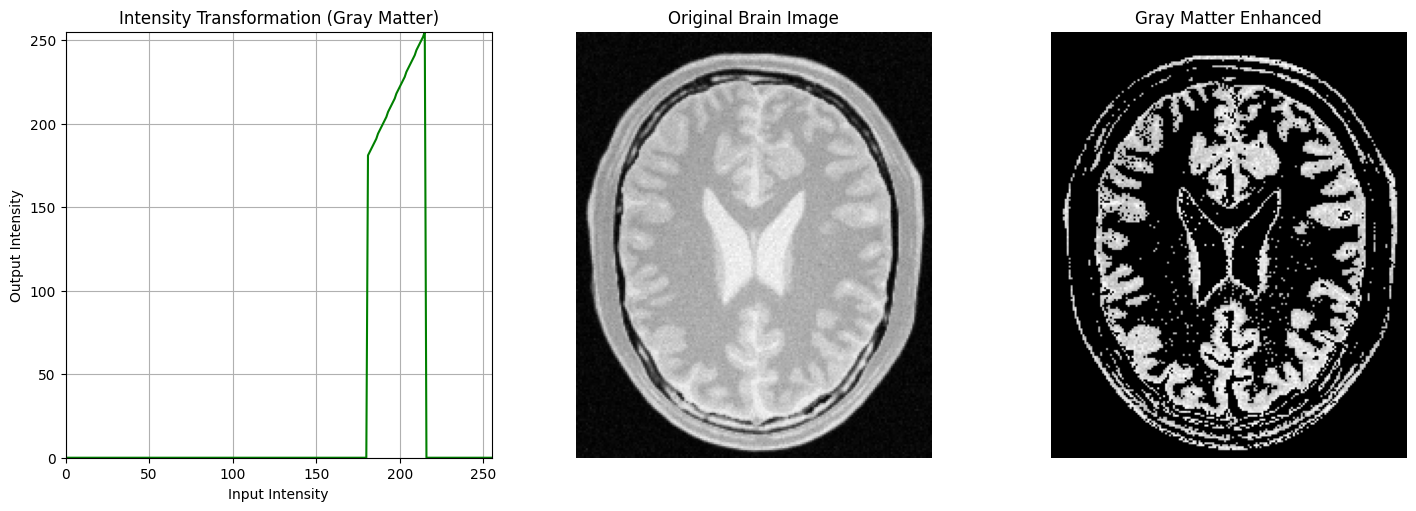

In [76]:
# Define control points for gray matter enhancement
control_points = np.array([(180, 0), (215, 255)])

# Create intensity transformation LUT
pre_transition = np.zeros(control_points[0, 0] + 1).astype('uint8')
transition = np.linspace(control_points[0, 0] + 1, control_points[1, 1], control_points[1, 0] - control_points[0, 0]).astype('uint8')
post_transition = np.zeros(256 - len(pre_transition) - len(transition)).astype('uint8')

# Final lookup table
intensity_transform_lut = np.concatenate((pre_transition, transition, post_transition)).astype('uint8')

# Apply transformation using LUT
transformed_brain_image = cv.LUT(img_brain, intensity_transform_lut)

# Plot everything
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Transformation plot
ax[0].plot(intensity_transform_lut, color='green')
ax[0].set_title("Intensity Transformation (Gray Matter)")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].grid(True)
ax[0].set_aspect('equal')

# Original image
ax[1].imshow(img_brain, cmap='gray')
ax[1].set_title("Original Brain Image")
ax[1].axis('off')

# Transformed image
ax[2].imshow(transformed_brain_image, cmap='gray')
ax[2].set_title("Gray Matter Enhanced")
ax[2].axis('off')

plt.tight_layout()
plt.show()
